# Defining geographic regions

PolarToolkit uses geographic regions for downloading subsets of data and defining plot boundaries. These geographic regions are in the form of (x_min, x_max, y_min, y_min) where x and y refer to meters east and north of the pole, respectively. These are in polar stereographic projects EPSG 3031 and 3413 for the north and south poles, respectively. There several ways you can define a geographic region, which we show here.

In [7]:
import pygmt

from polartoolkit import fetch, maps, regions, utils

# Pre defined 
PolarToolkit provides many pre-defined regions which you can access with 
```python
from polartoolkit import regions

regions.<<name of region you want>>
```

Below is a list of all available regions.

In [2]:
# Add all region strings to dictionary
region_dict = regions.get_regions()

# extract antarctic and greenland strings
antarctic_strings = []
for x in list(region_dict.keys()):
    if x == "greenland":
        break
    else:
        antarctic_strings.append(x)

greenland_strings = [x for x in list(region_dict.keys()) if x not in antarctic_strings]

# subset dict for antarctica and greeland
antarctic_regions = {k: region_dict[k] for k in antarctic_strings}
greenland_regions = {k: region_dict[k] for k in greenland_strings}

antarctic_regions, greenland_regions

({'antarctica': (-2800000.0, 2800000.0, -2800000.0, 2800000.0),
  'west_antarctica': (-2740000.0, 570000.0, -2150000.0, 1670000.0),
  'east_antarctica': (-840000.0, 2880000.0, -2400000.0, 2600000.0),
  'antarctic_peninsula': (-2600000.0, -1200000.0, 170000.0, 1800000.0),
  'marie_byrd_land': (-1500000.0, -500000.0, -1350000.0, -800000.0),
  'victoria_land': (100000.0, 1000000.0, -2200000.0, -1000000.0),
  'saunders_coast': (-980000.0, -600000.0, -1350000.0, -1100000.0),
  'roosevelt_island': (-480000.0, -240000.0, -1220000.0, -980000.0),
  'ross_island': (210000.0, 360000.0, -1400000.0, -1250000.0),
  'minna_bluff': (210000.0, 390000.0, -1310000.0, -1120000.0),
  'mcmurdo_dry_valleys': (320000.0, 480000.0, -1400000.0, -1220000.0),
  'siple_coast': (-700000.0, 30000.0, -1110000.0, -450000.0),
  'crary_ice_rise': (-330000.0, -40000.0, -830000.0, -480000.0),
  'siple_dome': (-630000.0, -270000.0, -970000.0, -630000.0),
  'ross_ice_shelf': (-680000.0, 470000.0, -1420000.0, -310000.0),
  'n

And here are some maps showing these available regions.

Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use officia

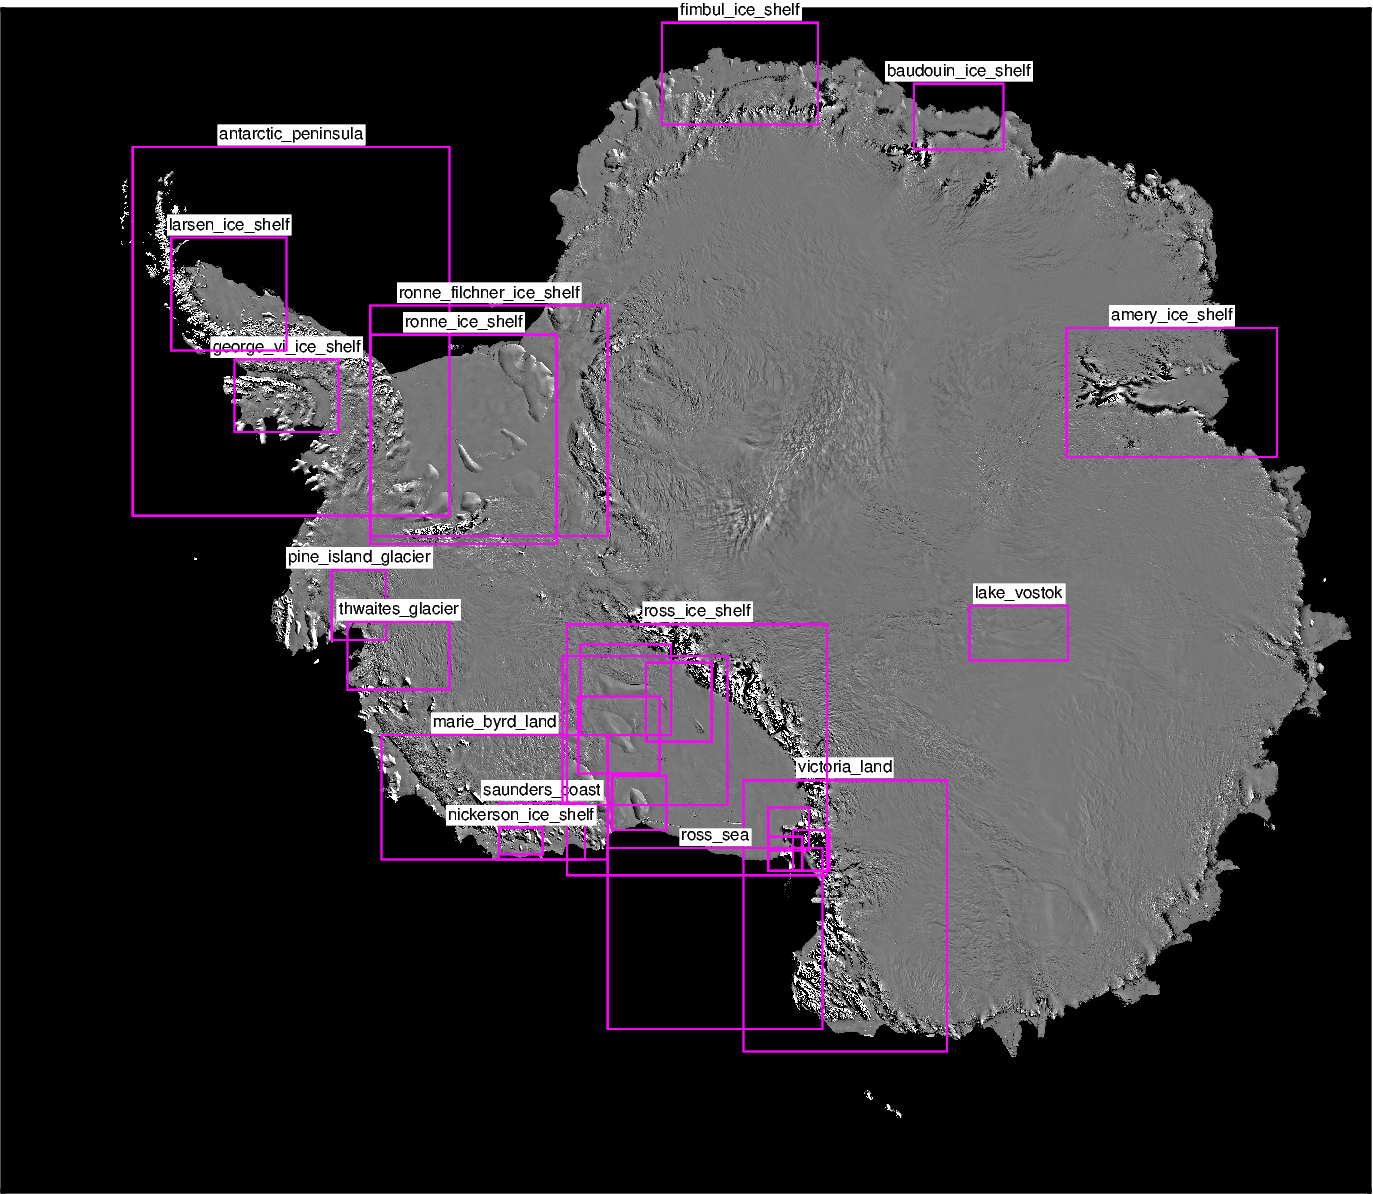

In [3]:
# remove large regions to not crowd plots
remove = ["antarctica", "west_antarctica", "east_antarctica"]
[antarctic_regions.pop(key, None) for key in remove]

remove = ["greenland"]
[greenland_regions.pop(key, None) for key in remove]

fig = maps.plot_grd(
    grid=fetch.modis(hemisphere="south"),
    modis=True,
)

from statistics import mean

for k, v in antarctic_regions.items():
    maps.add_box(fig, v, pen=".6p,magenta")
    if k not in [
        "minna_bluff",
        "mcmurdo_dry_valleys",
        "siple_dome",
        "siple_coast",
        "roosevelt_island",
        "ross_island",
        "crary_ice_rise",
        "kamb_ice_stream",
    ]:
        fig.text(
            x=mean([v[1], v[0]]),
            y=v[3],
            text=k,
            justify="CB",
            offset="0/.1",
            no_clip=True,
            font="6p,Helvetica,black",
            fill="white",
        )

fig.show(dpi=200)

Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
Warning 1: The definition of geographic CRS EPSG:4326 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use officia

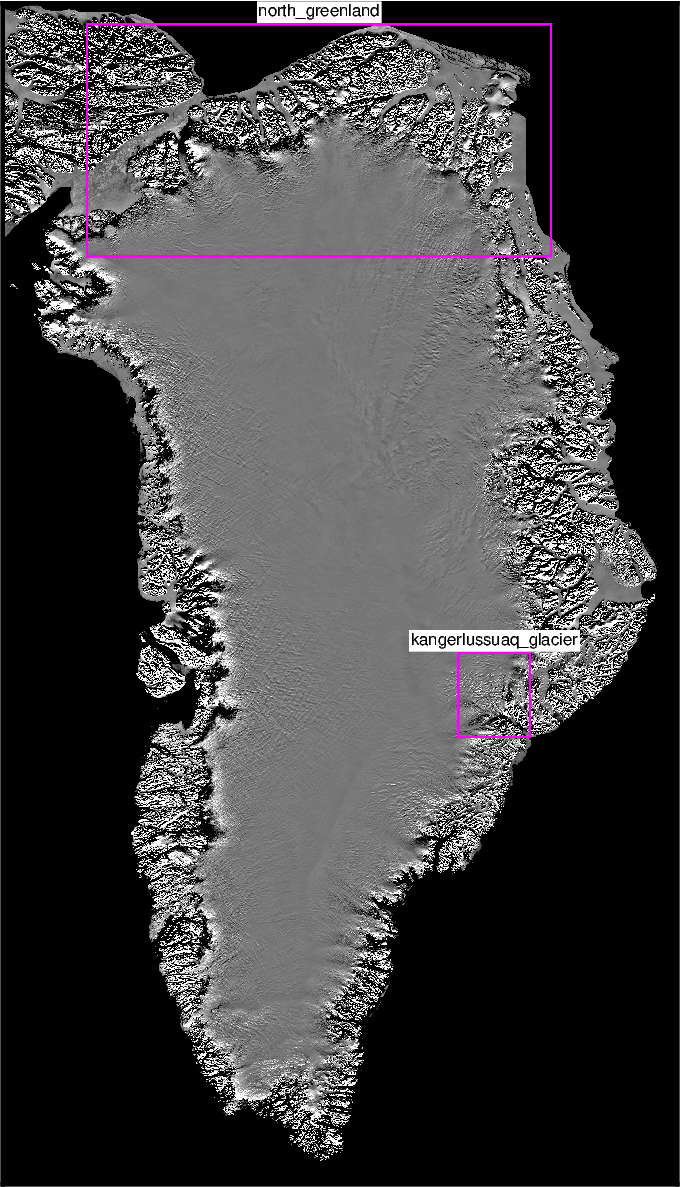

In [4]:
fig = maps.plot_grd(
    grid=fetch.modis(hemisphere="north"),
    region=regions.greenland,
    modis=True,
)

for k, v in greenland_regions.items():
    maps.add_box(fig, v, pen=".6p,magenta")
    fig.text(
        x=mean([v[1], v[0]]),
        y=v[3],
        text=k,
        justify="CB",
        offset="0/.1",
        no_clip=True,
        font="6p,Helvetica,black",
        fill="white",
    )

fig.show(dpi=200)

## Manually defined
You can simple enter your own values for a geographic region. It should be in the form of a tuple, for example
```python
region = (-3500, 50000, -200100, -180000)
```
You can use the below maps to read of the approximate values you need for your region boundaries. 

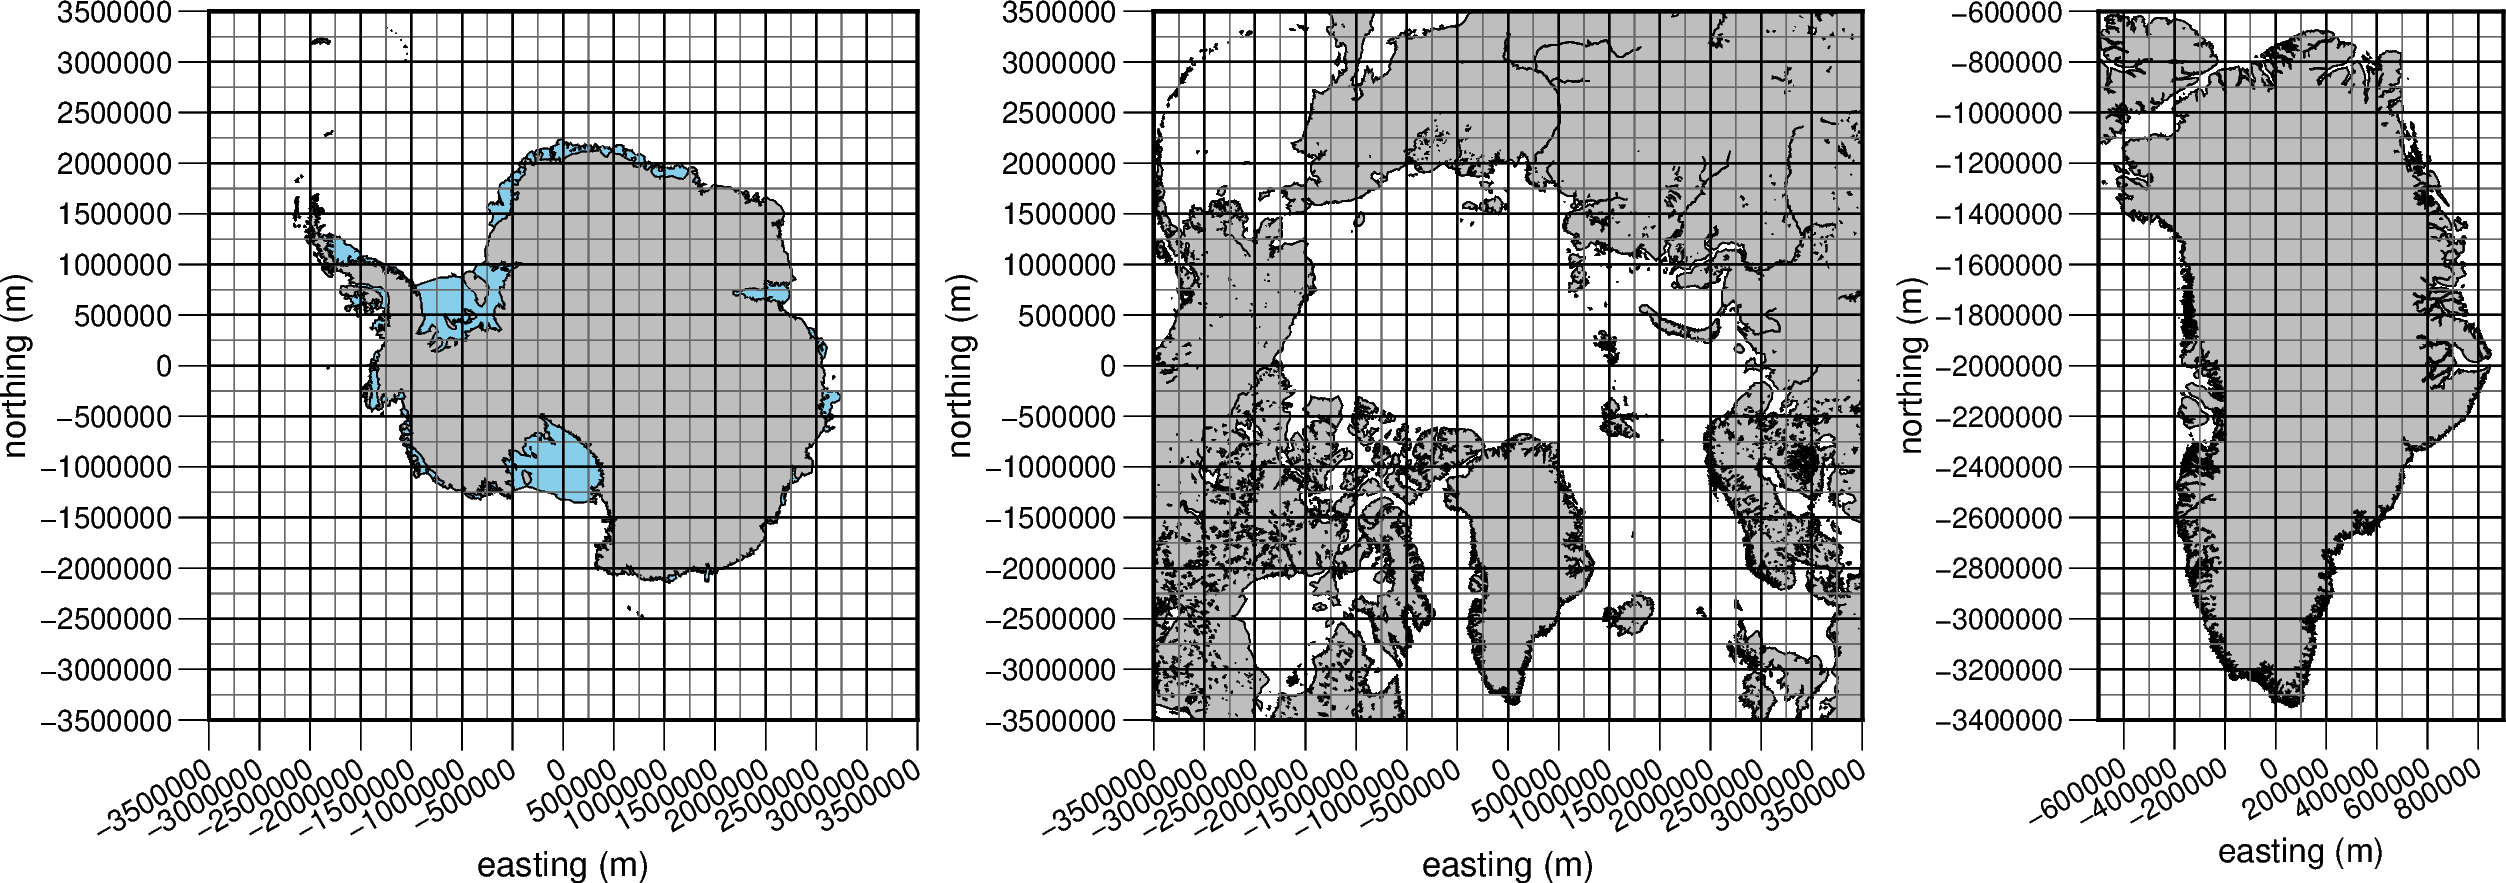

In [5]:
fig = pygmt.Figure()

region = (-3500e3, 3500e3, -3500e3, 3500e3)
fig_proj, fig_proj_ll, fig_width, fig_height = utils.set_proj(
    region=region,
    hemisphere="south",
    fig_height=9,  # cm
)
fig.coast(
    region=(*region, "+ue"),
    projection=fig_proj_ll,
    shorelines="0.5p,black",
    land="skyblue",
)
fig.coast(
    projection=fig_proj_ll, area_thresh="+ag", shorelines="0.5p,black", land="gray"
)
with pygmt.config(
    MAP_GRID_PEN_PRIMARY=".4p,dimgray", MAP_GRID_PEN_SECONDARY=".75p,black"
):
    fig.basemap(
        projection=fig_proj,
        frame=[
            "sxa500000g500000+a30+leasting (m)",
            "pxg250000",
            "sya500000g500000+lnorthing (m)",
            "pyg250000",
        ],
    )

fig.shift_origin(xshift=fig_width + 3)

fig_proj, fig_proj_ll, fig_width, fig_height = utils.set_proj(
    region=region,
    hemisphere="north",
    fig_height=9,  # cm
)
fig.coast(
    region=(*region, "+ue"),
    projection=fig_proj_ll,
    shorelines="0.5p,black",
    land="skyblue",
)
fig.coast(
    projection=fig_proj_ll, area_thresh="+ag", shorelines="0.5p,black", land="gray"
)
with pygmt.config(
    MAP_GRID_PEN_PRIMARY=".4p,dimgray", MAP_GRID_PEN_SECONDARY=".75p,black"
):
    fig.basemap(
        projection=fig_proj,
        frame=[
            "sxa500000g500000+a30+leasting (m)",
            "pxg250000",
            "sya500000g500000+lnorthing (m)",
            "pyg250000",
        ],
    )

fig.shift_origin(xshift=fig_width + 3)

region = regions.greenland
fig_proj, fig_proj_ll, fig_width, fig_height = utils.set_proj(
    region=region,
    hemisphere="north",
    fig_height=9,  # cm
)
fig.coast(
    region=(*region, "+ue"),
    projection=fig_proj_ll,
    shorelines="0.5p,black",
    land="skyblue",
)
fig.coast(
    projection=fig_proj_ll, area_thresh="+ag", shorelines="0.5p,black", land="gray"
)
with pygmt.config(
    MAP_GRID_PEN_PRIMARY=".4p,dimgray", MAP_GRID_PEN_SECONDARY=".75p,black"
):
    fig.basemap(
        projection=fig_proj,
        frame=[
            "sxa200000g200000+a30+leasting (m)",
            "pxg100000",
            "sya200000g200000+lnorthing (m)",
            "pyg100000",
        ],
    )

fig.show(dpi=200)

If you install `ipyleaflet` with `mamba install ipyleaflet`, the below code wil show an interactive map and clicking will give coordinates in polar stereographic, which you can copy and paste to create a region.

In [9]:
maps.interactive_map(hemisphere="south", show=False)
# unfortunately the interactive map does not display for the online documentation

Label(value='')

Map(center=[-90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

## Interactively defined
You can use the function `regions.draw_region` to interactively draw a polygon and return the bounding region for it. 

In [10]:
polygon = regions.draw_region(hemisphere="north")
# unfortunately the interactive map does not display for the online documentation

Label(value='')

Map(center=[90, -45], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [11]:
region = utils.polygon_to_region(polygon, hemisphere="north")
region

(-507043.46011953073,
 -154896.19444938024,
 -1074751.9508017618,
 -779823.9512760969)

## Defined by extent of data
You can use a dataset, either gridded or point data, to define a region by the extent of the data.

In [12]:
grid = fetch.sediment_thickness(version="tankersley-2022")

info = utils.get_grid_info(grid)

# the 2nd object is the region
region = info[1]

region

(-3330000.0, 1900000.0, -3330000.0, 1850000.0)

In [13]:
df = fetch.ghf(version="burton-johnson-2020", points=True)

import verde as vd

region = vd.get_region((df.x, df.y))

region

(-3771912.2124641463, 4304153.836767693, -4390203.790700719, 4294867.885261321)